<a href="https://colab.research.google.com/github/SachinPrasanth777/PyTorch/blob/main/Torch_Starter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import numpy as np
import matplotlib.pyplot as plt
import helper
import torch

In [8]:
!pip install six

In [9]:
from six.moves import urllib
opener = urllib.request.build_opener()
opener.addheaders = [('User-agent', 'Mozilla/5.0')]
urllib.request.install_opener(opener)

In [10]:
from torchvision import datasets, transforms
transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,))])

In [11]:
trainset = datasets.MNIST('~/.pytorch/MNIST_data/', download=True, train=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)

In [12]:
dataiter = iter(trainloader)
images, labels = next(dataiter)
print(type(images))
print(images.shape)
print(labels.shape)

<class 'torch.Tensor'>
torch.Size([64, 1, 28, 28])
torch.Size([64])


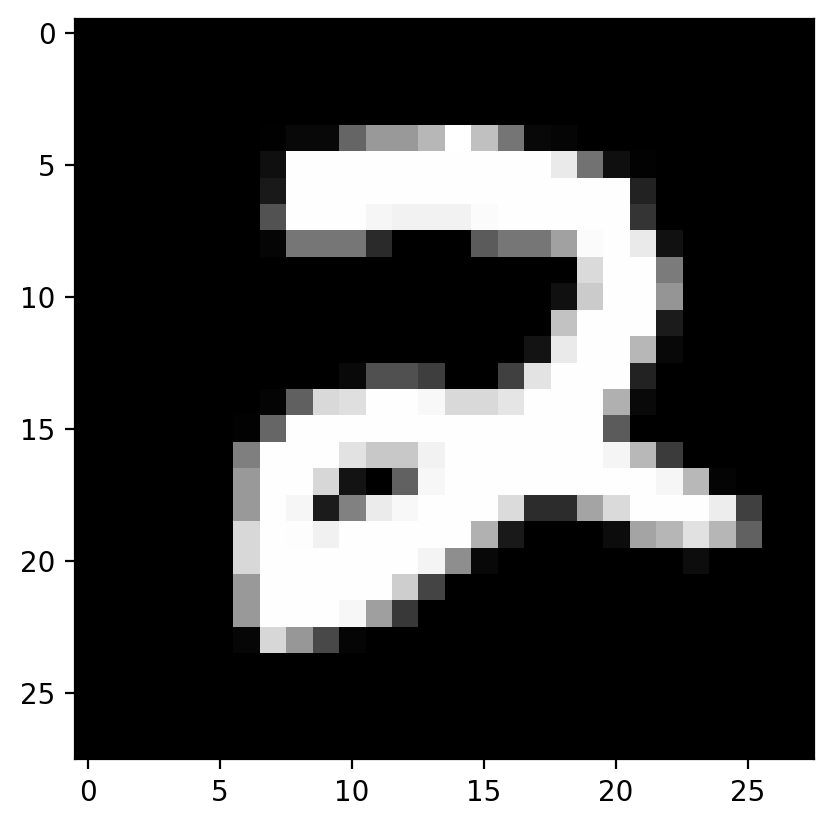

In [18]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r');

In [21]:
def activation(x):
  return 1/(1+torch.exp(-x))
inputs = images.view(images.shape[0], -1)
# w1 = (784,256) because (1,28,28) = (1x28x28) = 784 and 256 is the number of neurons in the hidden layer
w1 = torch.randn(784, 256)
b1 = torch.randn(256)
# for w2 it is 256 because of the weights
w2 = torch.randn(256, 10)
b2 = torch.randn(10)
h = activation(torch.mm(inputs, w1) + b1)
out = torch.mm(h, w2) + b2
print(out.shape)

torch.Size([64, 10])


In [25]:
def softmax(x):
  return torch.exp(x)/torch.sum(torch.exp(x),dim=1).view(-1,1)
probabilities = softmax(out)
print(probabilities.shape)
print(probabilities.sum(dim=1))

torch.Size([64, 10])
tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])


In [34]:
from torch import nn
class Network(nn.Module):
    def __init__(self):
        super().__init__()
        self.hidden = nn.Linear(784, 256)
        self.output = nn.Linear(256, 10)
        self.sigmoid = nn.Sigmoid()
        self.softmax = nn.Softmax(dim=1)
    def forward(self, x):
        x = self.hidden(x)
        x = self.sigmoid(x)
        x = self.output(x)
        x = self.softmax(x)
        return x

In [35]:
model = Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [38]:
class Networks(nn.Module):
  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784,128)
    self.fc2 = nn.Linear(128,64)
    self.fc3 = nn.Linear(64,10)
  def forward(self, x):
    x = self.fc1(x)
    x = nn.functional.relu(x)
    x = self.fc2(x)
    x = nn.functional.relu(x)
    x = self.fc3(x)
    x = nn.functional.softmax(x,dim=1)
    return x

In [39]:
models = Networks()
models

Networks(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=10, bias=True)
)

In [41]:
print(models.fc1.weight)
print(models.fc1.bias)

Parameter containing:
tensor([[ 0.0321, -0.0342,  0.0037,  ..., -0.0170,  0.0280, -0.0244],
        [ 0.0236,  0.0072,  0.0206,  ...,  0.0305,  0.0038,  0.0182],
        [-0.0214,  0.0120, -0.0047,  ...,  0.0084, -0.0321, -0.0083],
        ...,
        [-0.0204, -0.0324,  0.0065,  ...,  0.0167,  0.0320,  0.0252],
        [ 0.0083, -0.0134,  0.0136,  ...,  0.0119,  0.0014, -0.0118],
        [ 0.0197, -0.0108,  0.0351,  ..., -0.0117,  0.0136, -0.0124]],
       requires_grad=True)
Parameter containing:
tensor([-0.0054, -0.0023,  0.0243, -0.0303,  0.0295,  0.0141,  0.0276, -0.0068,
         0.0008,  0.0220,  0.0253, -0.0063,  0.0307, -0.0337,  0.0062, -0.0032,
        -0.0125, -0.0066, -0.0220, -0.0154,  0.0072, -0.0340, -0.0341,  0.0215,
         0.0334, -0.0025,  0.0230, -0.0128, -0.0176,  0.0022, -0.0198, -0.0135,
         0.0214, -0.0055, -0.0160, -0.0336, -0.0150, -0.0088,  0.0047, -0.0230,
         0.0342, -0.0134, -0.0269, -0.0232,  0.0313,  0.0338,  0.0144,  0.0084,
         0.0045

In [43]:
models.fc1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

In [44]:
models.fc1.weight.data.normal_(std=0.01)

tensor([[ 0.0105,  0.0175, -0.0068,  ...,  0.0168, -0.0030, -0.0049],
        [-0.0013, -0.0099, -0.0098,  ..., -0.0004,  0.0197, -0.0059],
        [-0.0084, -0.0030, -0.0126,  ..., -0.0042,  0.0232, -0.0049],
        ...,
        [ 0.0021,  0.0117,  0.0009,  ..., -0.0022, -0.0042,  0.0035],
        [-0.0012, -0.0026,  0.0057,  ...,  0.0022, -0.0102,  0.0007],
        [-0.0055, -0.0012, -0.0068,  ...,  0.0142,  0.0093, -0.0033]])

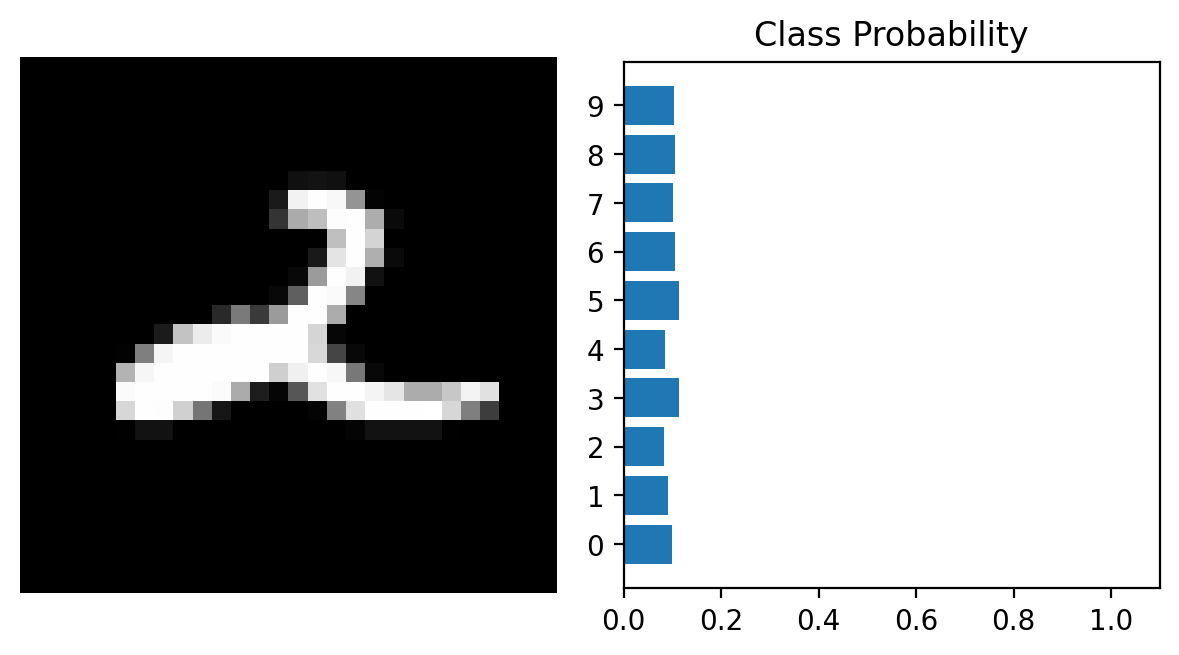

In [49]:
import matplotlib.pyplot as plt
import numpy as np

def view_classify(img, ps, version="MNIST"):
    '''
    Function for viewing an image and it's predicted classes.
    '''
    ps = ps.data.numpy().squeeze()

    fig, (ax1, ax2) = plt.subplots(figsize=(6,9), ncols=2)
    ax1.imshow(img.resize_(1, 28, 28).numpy().squeeze(), cmap='Greys_r') # Added cmap='Greys_r' for better visualization of MNIST images
    ax1.axis('off')
    ax2.barh(np.arange(10), ps)
    ax2.set_aspect(0.1)
    ax2.set_yticks(np.arange(10))

    if version == "MNIST":
        ax2.set_yticklabels(np.arange(10))
    elif version == "Fashion":
        ax2.set_yticklabels(['T-shirt/top',
                            'Trouser',
                            'Pullover',
                            'Dress',
                            'Coat',
                            'Sandal',
                            'Shirt',
                            'Sneaker',
                            'Bag',
                            'Ankle Boot'], size='small');
    ax2.set_title('Class Probability')
    ax2.set_xlim(0, 1.1)

    plt.tight_layout()


dataiter = iter(trainloader)
images, labels = next(dataiter)
images.resize_(64, 1, 784)
img_idx = 0
ps = models.forward(images[img_idx,:])
img = images[img_idx]
view_classify(img.view(1, 28, 28), ps) # Call the locally defined view_classify function